In [ ]:
import overpy

# Initialize the Overpass API
api = overpy.Overpass()

# Define the query to get power lines in Indonesia
query = """
[out:json];
area["ISO3166-1"="ID"][admin_level=2];
(
  way["power"="line"](area);
  node(w);
);
out center;
"""

# Fetch the data from Overpass API
result = api.query(query)

# Extract nodes and ways
nodes = result.nodes
ways = result.ways

# Create a GeoJSON FeatureCollection
features = []

# Add nodes to the features
for node in nodes:
  features.append({
      "type": "Feature",
      "geometry": {
          "type": "Point",
          "coordinates": [float(node.lon), float(node.lat)]
      },
      "properties": {
          "id": node.id,
          "tags": node.tags
      }
  })

# Add ways to the features
for way in ways:
  features.append({
      "type": "Feature",
      "geometry": {
          "type": "LineString",
          "coordinates": [[float(node.lon), float(node.lat)] for node in way.nodes]
      },
      "properties": {
          "id": way.id,
          "tags": way.tags
      }
  })

# Create a GeoJSON file
geojson = {
    "type": "FeatureCollection",
    "features": features
}

In [2]:
# Save the GeoJSON file
with open("power_lines_indonesia.geojson", "w") as f:
  import json
  json.dump(geojson, f, indent=2)

print("Power line data downloaded and saved to power_lines_indonesia.geojson")

Power line data downloaded and saved to power_lines_indonesia.geojson


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
from shapely.geometry import point,linestring

In [47]:
lines = read_file('geomagnet/data/power_lines.geojson')

In [55]:
land = gpd.read_file('geomagnet/data/ne_50m_land.zip', bbox=(94,-12,142,7))

In [87]:
a = [b.get('power') for b in data.tags.values]

In [95]:
a = [b.get('power') == 'portal' for b in data.tags.values]

In [97]:
portal.shape

(3160, 3)

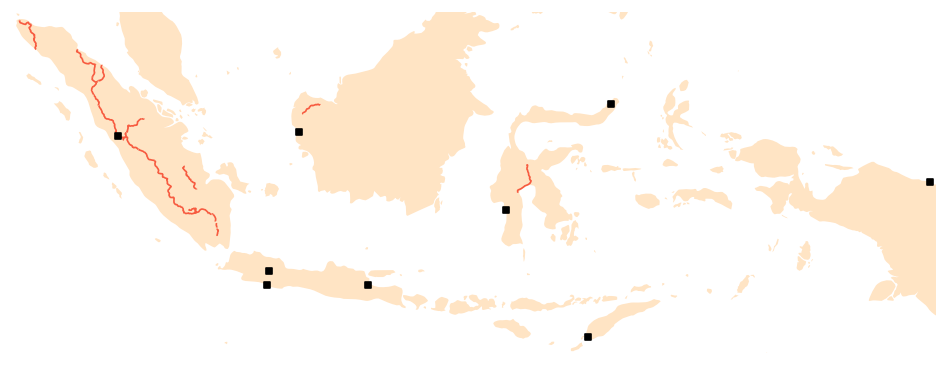

In [101]:
a = lines.voltage == 275000
fig,ax = plt.subplots(figsize=(8,4), dpi=120)
lines[a].plot(column='voltage', vmin=10000, vmax=500000, cmap='Reds',
           linewidth=1, ax=ax, zorder=50, legend=False)

land.plot(ax=ax, color='bisque', zorder=10)
stations.plot(marker='s', markersize=10, ax=ax, zorder=100, color='k')
ax.set_xlim(95, 141)
ax.set_ylim(-11, 6)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('geomagnet/tmp.svg')
plt.show()

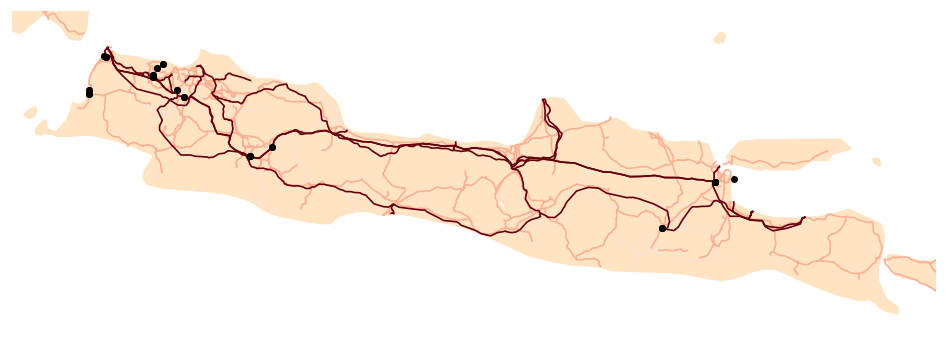

In [93]:
fig,ax = plt.subplots(figsize=(8,4), dpi=120)
lines.plot(column='voltage', vmin=10000, vmax=500000, cmap='Reds',
           linewidth=1, ax=ax, zorder=50, legend=False)

land.plot(ax=ax, color='bisque', zorder=10)
trafo.plot(marker='o', markersize=10, ax=ax, zorder=100, color='k')
ax.set_xlim(105, 115)
ax.set_ylim(-9, -5.5)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('geomagnet/map_java.svg')
plt.show()

In [68]:
lats = [0.0,-0.2,-6.9,-2.5,-3.9,1.4,-10.2,-7.6,-7.6]
lons = [109.3,100.3,107.8,140.7,119.6,124.8,123.7,107.7,112.7]
code = ['PTN','KTB','TJS','JYP','PRP','MND','KPG','PMK','WTK']
name = ['Pontianak','Agam','Sumedang','Jayapura','Parepare','Manado','Kupang','Garut','Pasuruan']
stations = gpd.GeoDataFrame(data={'code':code, 'name':name},
                            geometry=gpd.points_from_xy(lons,lats))

In [40]:
set(lines.voltage.values, categorical=True)

TypeError: set() takes no keyword arguments

In [37]:
voltage = [int(a.get('voltage', '0').split(';')[0]) for a in lines.tags.values]
lines['voltage'] = voltage

In [98]:
set(voltage)

{0, 20000, 70000, 75000, 150000, 230000, 275000, 500000}